# Coursera Data Science capstone project

5/10/2020

## Introduction / Business Problem

_Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem_

In the past several years there has been a large increase in the number of "foodies" (A foodie is a person who has an ardent or refined interest in food and who eats food not only out of hunger but due to their interest or hobby[1]). "The food marketing system, including food service and food retailing, supplied about $1.46 trillion worth of food in 2014."[2] This increase has pushed cities to develop their restaurant industry to include a diverse range of restaurants from all over the world. I would like to explore several cities in the U.S. and compare them based on the diversity of restaurants and those restaurants' ratings. For example, does Baltimore have an equal number of Afghan and Chinese restaurants and how does that compare to Seattle? This exploration will be useful for foodies looking to travel to cities on their next adventure or for the cities looking to bring in more tourism. 


1. https://en.wikipedia.org/wiki/Foodie
2. https://www.ers.usda.gov/topics/food-markets-prices/food-service-industry/market-segments/

## Data

_Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data_

First I will choose 3 cities of similar size to explore, based on data from https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population. Then I will get the city's latitude and longitude from the same data set and use this to get the venue data from Foursquare. I will list the venues by category and refine by restaurants only. Then I will one hot encode the restaurants and get their mean and frequency. I will compare this data for the three cities and map the different types of venues for each city. Ideally, the data will clearly point to a city by having many more types of restaurants than another. 

## Methodology

the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

#### City Selection

Import the data from Wikipedia and convert into a data frame

In [1]:
%pip install lxml
%pip install beautifulsoup4
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from bs4 import BeautifulSoup
import numpy as np

     |████████████████████████████████| 5.5MB 5.0MB/s eta 0:00:01     |████████▌                       | 1.5MB 5.0MB/s eta 0:00:01████████      | 4.5MB 5.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 122kB 6.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
link = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
tables = pd.read_html(link, encoding="utf8")
table = tables[4]
df = pd.DataFrame(table)
df.head()

2019rank         City    State[c]  2019estimate  2010Census   Change  \
0         1  New York[d]    New York       8336817     8175133   +1.98%   
1         2  Los Angeles  California       3979576     3792621   +4.93%   
2         3      Chicago    Illinois       2693976     2695598   −0.06%   
3         4   Houston[3]       Texas       2320268     2100263  +10.48%   
4         5      Phoenix     Arizona       1680992     1445632  +16.28%   

  2016 land area 2016 land area.1 2016 population density  \
0    301.5 sq mi        780.9 km2            28,317/sq mi   
1    468.7 sq mi      1,213.9 km2             8,484/sq mi   
2    227.3 sq mi        588.7 km2            11,900/sq mi   
3    637.5 sq mi      1,651.1 km2             3,613/sq mi   
4    517.6 sq mi      1,340.6 km2             3,120/sq mi   

  2016 population density.1                                         Location  
0                10,933/km2    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W  
1                 3,276/km2  34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W  
2                 4,600/km2    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W  
3                 1,395/km2    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W  
4                 1,200/km2  33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W

In [18]:
df.dtypes

2018rank                      int64
City                         object
State[c]                     object
2018estimate                  int64
2010Census                    int64
Change                       object
2016 land area               object
2016 land area.1             object
2016 population density      object
2016 population density.1    object
Location                     object
dtype: object

Rename columns and convert to string to process

In [3]:
df.rename(columns={"State[c]":"State", "2016 land area.1": "Land Area", "2016 population density.1": "Population Density"}, inplace = True)
df.to_string(columns = {"City", "State", "Land Area", "Population Density"})
df.dtypes

2019rank                    int64
City                       object
State                      object
2019estimate                int64
2010Census                  int64
Change                     object
2016 land area             object
Land Area                  object
2016 population density    object
Population Density         object
Location                   object
dtype: object

Remove units from land area and population density

In [4]:
df['Land Area'] = df['Land Area'].str.rstrip(' km2')
df['Population Density'] = df['Population Density'].str.rstrip('/km2')
df.head()

2019rank         City       State  2019estimate  2010Census   Change  \
0         1  New York[d]    New York       8336817     8175133   +1.98%   
1         2  Los Angeles  California       3979576     3792621   +4.93%   
2         3      Chicago    Illinois       2693976     2695598   −0.06%   
3         4   Houston[3]       Texas       2320268     2100263  +10.48%   
4         5      Phoenix     Arizona       1680992     1445632  +16.28%   

  2016 land area Land Area 2016 population density Population Density  \
0    301.5 sq mi    780.9             28,317/sq mi             10,933   
1    468.7 sq mi  1,213.9              8,484/sq mi              3,276   
2    227.3 sq mi    588.7             11,900/sq mi              4,600   
3    637.5 sq mi  1,651.1              3,613/sq mi              1,395   
4    517.6 sq mi  1,340.6              3,120/sq mi              1,200   

                                          Location  
0    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W  
1  34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W  
2    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W  
3    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W  
4  33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W

Remove commas from values and change to float from object

In [5]:
df['Land Area'] = df['Land Area'].str.replace(",","").astype(float)
df['Population Density'] = df['Population Density'].str.replace(",","").astype(float)
df.head()

2019rank         City       State  2019estimate  2010Census   Change  \
0         1  New York[d]    New York       8336817     8175133   +1.98%   
1         2  Los Angeles  California       3979576     3792621   +4.93%   
2         3      Chicago    Illinois       2693976     2695598   −0.06%   
3         4   Houston[3]       Texas       2320268     2100263  +10.48%   
4         5      Phoenix     Arizona       1680992     1445632  +16.28%   

  2016 land area  Land Area 2016 population density  Population Density  \
0    301.5 sq mi      780.9            28,317/sq mi             10933.0   
1    468.7 sq mi     1213.9             8,484/sq mi              3276.0   
2    227.3 sq mi      588.7            11,900/sq mi              4600.0   
3    637.5 sq mi     1651.1             3,613/sq mi              1395.0   
4    517.6 sq mi     1340.6             3,120/sq mi              1200.0   

                                          Location  
0    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W  
1  34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W  
2    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W  
3    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W  
4  33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W

Create a new data frame with only the City, State, land area, and population density and sort by population and area

In [6]:
pop = df[["City", "State", "Land Area", "Population Density"]]
pop.sort_values(by = ['Population Density'], ignore_index = True,inplace = True)
pop.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City       State  Land Area  Population Density
0        Carmel     Indiana      123.0                 8.0
1      Stockton  California      159.8                19.0
2    Augusta[t]     Georgia      783.5                25.0
3       Abilene       Texas      276.4                44.0
4  Broken Arrow    Oklahoma      159.8                67.0

In [7]:
area = df[["City", "State", "Land Area", "Population Density"]]
area.sort_values(by = ['Land Area'], ignore_index = True, inplace = True)
area.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City          State  Land Area  Population Density
0  Cambridge  Massachusetts       16.6              6675.0
1  Daly City     California       19.7              5409.0
2   Paterson     New Jersey       21.8              6800.0
3  Inglewood     California       23.6              4700.0
4   El Monte     California       24.9              4658.0

Find the index of Baltimore

In [8]:
baltimore_p = pop[pop['City'].str.match('Baltimore')].index
baltimore_a = area[area['City'].str.match('Baltimore')].index

In [9]:
baltimore_p = baltimore_p[0]
baltimore_a = baltimore_a[0]

Get the surrounding cities based on area and population

In [10]:
pop20 = pop.iloc[baltimore_p-20:baltimore_p+20] #Get the cities with similar population densities to Baltimore
area20 = area.iloc[baltimore_a-20:baltimore_a+20] #Get the cities with similar area to Baltimore
area20

City           State  Land Area  Population Density
196        Gilbert[q]         Arizona      176.1              1346.0
197           Spokane      Washington      177.9              1214.0
198   Newport News[m]        Virginia      179.0              1016.0
199      Cedar Rapids            Iowa      183.4               715.0
200             Plano           Texas      185.7              1540.0
201        Tuscaloosa         Alabama      185.7               540.0
202     Wichita Falls           Texas      187.0               560.0
203     Grand Prairie           Texas      187.3              1018.0
204       Victorville      California      189.8               644.0
205  North Charleston  South Carolina      190.9               573.0
206           Midland           Texas      192.7               698.0
207     Overland Park          Kansas      194.5               971.0
208       Sioux Falls    South Dakota      195.3               893.0
209        Las Cruces      New Mexico      199.2               511.0
210           Madison       Wisconsin      199.4              1270.0
211        Cincinnati            Ohio      200.5              1490.0
212           Fremont      California      200.7              1161.0
213         Cleveland            Ohio      201.2              1917.0
214      Independence        Missouri      201.5               581.0
215            Toledo            Ohio      209.0               133.0
216      Baltimore[m]        Maryland      209.5              2934.0
217         Riverside      California      210.3              1544.0
218          Beaumont           Texas      212.6               556.0
219          Boise[r]           Idaho      212.6              1049.0
220       Springfield        Missouri      213.2               785.0
221           Seattle      Washington      217.0              3245.0
222    Baton Rouge[s]       Louisiana      222.5              1024.0
223        Des Moines            Iowa      230.2               936.0
224              Waco           Texas      230.5               580.0
225           Lincoln        Nebraska      238.5              1175.0
226            Denton           Texas      241.9               553.0
227         Lancaster      California      244.2               656.0
228         Arlington           Texas      248.1              1600.0
229         Milwaukee       Wisconsin      249.2              2388.0
230        Sacramento      California      253.6              1953.0
231   North Las Vegas          Nevada      253.8               941.0
232       Clarksville       Tennessee      254.6               590.0
233         Knoxville       Tennessee      255.1               730.0
234       Tallahassee         Florida      260.0               734.0
235            Laredo           Texas      261.8                98.0

Find similar cities by seeing which cities overlap

In [11]:
result = area20.City.isin(pop20.City)
result = pd.DataFrame(result)
result

City
196  False
197  False
198  False
199  False
200  False
201  False
202  False
203  False
204  False
205  False
206  False
207  False
208  False
209  False
210  False
211  False
212  False
213  False
214  False
215  False
216   True
217  False
218  False
219  False
220  False
221   True
222  False
223  False
224  False
225  False
226  False
227  False
228  False
229   True
230  False
231  False
232  False
233  False
234  False
235  False

In [12]:
sim_cities = result.query('City==True').index.tolist() #get index of all cities in both lists
sim_cities

[216, 221, 229]

In [13]:
area20.loc[sim_cities] #get the data for similar cities

City       State  Land Area  Population Density
216  Baltimore[m]    Maryland      209.5              2934.0
221       Seattle  Washington      217.0              3245.0
229     Milwaukee   Wisconsin      249.2              2388.0

Find the these cities in the larger dataframe, make into its own dataframe, and make longitude and latitude columns

In [14]:
baltimore_df = df[df['City'].str.match('Baltimore')].index
baltimore_df = baltimore_df[0]
seattle = df[df['City'].str.match('Seattle')].index
seattle = seattle[0]
milwaukee = df[df['City'].str.match('Milwaukee')].index
milwaukee = milwaukee[0]
cities = [baltimore_df, seattle, milwaukee]
cities

[29, 17, 30]

In [15]:
cities3 = df.loc[cities]
cities3.drop(['2019rank','2019estimate','2010Census','2016 land area','Land Area','2016 population density','Population Density', 'Change'], axis = 1, inplace = True)
cities3.replace('Baltimore[m]','Baltimore', regex=True)
cities3['coords'] = cities3['Location'].str.split(' / ').str[1]
cities3['Latitude'] = cities3['coords'].str.split('°N').str[0]
cities3['Latitude'] = cities3['Latitude'].str.strip(u'\ufeff').astype(float)
cities3['Longitude'] = cities3['coords'].str.split('°N ').str[1]
cities3['Longitude'] = cities3['Longitude'].str.rstrip('°W').astype(float)
cities3['Longitude'] = cities3['Longitude']*-1
cities3.drop(['Location','coords'], axis = 1, inplace = True)
cities3.set_index('City', inplace = True)
cities3.head()

State  Latitude  Longitude
City                                         
Baltimore[m]    Maryland   39.3000   -76.6105
Seattle       Washington   47.6205  -122.3509
Milwaukee      Wisconsin   43.0633   -87.9667

In [16]:
cities3.dtypes

State         object
Latitude     float64
Longitude    float64
dtype: object

In [17]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

Make a map of the three cities to visualize the areas we picked


In [18]:
# create map of Baltimore using latitude and longitude values
lat = cities3.loc['Baltimore[m]','Latitude']
lng = cities3.loc['Baltimore[m]', 'Longitude']
map_baltimore = folium.Map(location=[lat, lng], zoom_start=12)
# add radius to map
folium.CircleMarker(
        [lat, lng],
        radius=150,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_baltimore)  

map_baltimore

In [19]:
# create map of Seattle using latitude and longitude values
lat = cities3.loc['Seattle','Latitude']
lng = cities3.loc['Seattle', 'Longitude']
map_S = folium.Map(location=[lat, lng], zoom_start=12)
# add radius to map
folium.CircleMarker(
        [lat, lng+.03],
        radius=150,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_S)  

map_S

In [20]:
# create map of Baltimore using latitude and longitude values
lat = cities3.loc['Milwaukee','Latitude']
lng = cities3.loc['Milwaukee', 'Longitude']
map_M = folium.Map(location=[lat, lng], zoom_start=12)
# add radius to map
folium.CircleMarker(
        [lat, lng],
        radius=150,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_M)  

map_M

Read in zip code data for Baltimore from CSV file

In [19]:
csv = pd.read_csv("Baltimore-zips.csv", delimiter = ';')
baltimore_zips = pd.DataFrame(csv)
baltimore_zips.head()

Zip       City State   Latitude  Longitude  Timezone  \
0  21241  Baltimore    MD  39.284707 -76.620489        -5   
1  21250  Baltimore    MD  39.258226 -76.713149        -5   
2  21210  Baltimore    MD  39.352496 -76.634520        -5   
3  21298  Baltimore    MD  39.284707 -76.620489        -5   
4  21297  Baltimore    MD  39.284707 -76.620489        -5   

   Daylight savings time flag              geopoint  
0                           1  39.284707,-76.620489  
1                           1  39.258226,-76.713149  
2                           1   39.352496,-76.63452  
3                           1  39.284707,-76.620489  
4                           1  39.284707,-76.620489

Initialize Foursquare credentials and pull baltimore data 

In [20]:
CLIENT_ID = 'MG50ZYTHMFBCGPD4SCUDZ1KW4BSOC04FYBCRMGSCYQYM3CCH' # your Foursquare ID
CLIENT_SECRET = 'JYEEXPN2ZIDVKYWEW25PBYU2EELU0L4NLZ4YWQWBGR13BULZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MG50ZYTHMFBCGPD4SCUDZ1KW4BSOC04FYBCRMGSCYQYM3CCH
CLIENT_SECRET:JYEEXPN2ZIDVKYWEW25PBYU2EELU0L4NLZ4YWQWBGR13BULZ


In [21]:
lat = cities3.loc['Baltimore[m]','Latitude']
lng = cities3.loc['Baltimore[m]', 'Longitude']
cat_ID = '4d4b7105d754a06374d81259' #food category
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
#url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
url = 'https://api.foursquare.com/v2/venues/explore?category&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    #cat_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?category&client_id=MG50ZYTHMFBCGPD4SCUDZ1KW4BSOC04FYBCRMGSCYQYM3CCH&client_secret=JYEEXPN2ZIDVKYWEW25PBYU2EELU0L4NLZ4YWQWBGR13BULZ&v=20180605&ll=39.3,-76.6105&radius=1000&limit=100'

In [24]:
results = requests.get(url).json()

In [30]:
results

{'meta': {'code': 200, 'requestId': '5ecc1c6398205d001b6bd675'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Penn - Fallsway',
  'headerFullLocation': 'Penn - Fallsway, Baltimore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 121,
  'suggestedBounds': {'ne': {'lat': 39.30900000900001,
    'lng': -76.5988913954839},
   'sw': {'lat': 39.290999990999985, 'lng': -76.6221086045161}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c016f964a520e9ef20e3',
       'name': 'Center Stage',
       'location': {'address': '700 N Calvert St',
        'crossStreet': 'at E Monument St',
        'lat': 39.29791609061346,
        'l

A function for the category of the venue

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Add baltimore venue data to dataframe

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name   categories        lat        lng
0        Center Stage      Theater  39.297916 -76.613057
1             Iggie's  Pizza Place  39.299567 -76.613088
2       The Prime Rib   Steakhouse  39.302609 -76.612716
3             Dooby's         Café  39.298867 -76.615794
4  Mount Vernon Place         Park  39.297514 -76.615651

A function for getting venue data

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get the venue data for every Baltimore zipcode

In [24]:
all_venues_baltimore = getNearbyVenues(names=baltimore_zips['Zip'],
                                   latitudes=baltimore_zips['Latitude'],
                                   longitudes=baltimore_zips['Longitude']
                                  )

21241
21250
21210
21298
21297
21213
21216
21235
21224
21240
21209
21281
21283
21223
21233
21230
21273
21288
21206
21212
21284
21287
21275
21217
21239
21289
21211
21278
21218
21201
21203
21285
21215
21270
21280
21263
21274
21290
21252
21265
21214
21264
21202
21251
21229
21231
21260
21205
21279
21268
21282


In [29]:
all_venues_baltimore

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0            21241              39.284707              -76.620489   
1            21241              39.284707              -76.620489   
2            21241              39.284707              -76.620489   
3            21241              39.284707              -76.620489   
4            21241              39.284707              -76.620489   
5            21241              39.284707              -76.620489   
6            21241              39.284707              -76.620489   
7            21241              39.284707              -76.620489   
8            21241              39.284707              -76.620489   
9            21241              39.284707              -76.620489   
10           21241              39.284707              -76.620489   
11           21241              39.284707              -76.620489   
12           21241              39.284707              -76.620489   
13           21241              39.284707              -76.620489   
14           21241              39.284707              -76.620489   
15           21241              39.284707              -76.620489   
16           21241              39.284707              -76.620489   
17           21241              39.284707              -76.620489   
18           21241              39.284707              -76.620489   
19           21241              39.284707              -76.620489   
20           21241              39.284707              -76.620489   
21           21241              39.284707              -76.620489   
22           21241              39.284707              -76.620489   
23           21241              39.284707              -76.620489   
24           21241              39.284707              -76.620489   
25           21241              39.284707              -76.620489   
26           21241              39.284707              -76.620489   
27           21241              39.284707              -76.620489   
28           21241              39.284707              -76.620489   
29           21241              39.284707              -76.620489   
30           21241              39.284707              -76.620489   
31           21241              39.284707              -76.620489   
32           21241              39.284707              -76.620489   
33           21241              39.284707              -76.620489   
34           21241              39.284707              -76.620489   
35           21241              39.284707              -76.620489   
36           21241              39.284707              -76.620489   
37           21241              39.284707              -76.620489   
38           21241              39.284707              -76.620489   
39           21241              39.284707              -76.620489   
40           21241              39.284707              -76.620489   
41           21241              39.284707              -76.620489   
42           21241              39.284707              -76.620489   
43           21241              39.284707              -76.620489   
44           21241              39.284707              -76.620489   
45           21241              39.284707              -76.620489   
46           21241              39.284707              -76.620489   
47           21241              39.284707              -76.620489   
48           21241              39.284707              -76.620489   
49           21241              39.284707              -76.620489   
50           21241              39.284707              -76.620489   
51           21241              39.284707              -76.620489   
52           21241              39.284707              -76.620489   
53           21241              39.284707              -76.620489   
54           21241              39.284707              -76.620489   
55           21241              39.284707              -76.620489   
56           21241              39.284707              -76.620489   
57  

Add only food venues to a new dataframe "food_baltimore"

In [25]:
#Odd names are food venues that don't end in the work Restaurant based on Foresquare category data
odd_names = ['BBQ Joint','Bagel Shop','Bakery','Bistro','Breakfast Spot','Bubble Tea Shop','Burger Joint','Burrito Place','Café','Cheese Shop','Chocolate Shop','Coffee Shop','Creperie','Cupcake Shop','Deli / Bodega','Dessert Shop','Diner','Donut Shop','Farmers Market','Fish Market','Food Stand','Food Truck','Fried Chicken Joint','Frozen Yogurt Shop','Gastropub','Hot Dog Joint','Ice Cream Shop','Irish Pub','Juice Bar','Mac & Cheese Joint','Noodle House','Pie Shop','Pizza Place','Poke Place','Salad Place','Sandwich Place','Snack Place','Soup Place','Steakhouse','Taco Place','Tea Room','Wings Joint']
#Get all venues whose category ends in Restaurant into a dataframe
food_baltimore = all_venues_baltimore[all_venues_baltimore['Venue Category'].str.contains("Restaurant")]
#Add all odd name venues to another dataframe
other_foods_baltimore = all_venues_baltimore.loc[all_venues_baltimore['Venue Category'].isin(odd_names)]

#concatinate the food dataframes
x = [food_baltimore, other_foods_baltimore]
food_baltimore = pd.concat(x)
food_baltimore.set_index('Neighborhood',inplace = True)
food_baltimore.drop_duplicates(inplace = True)
food_baltimore

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                  
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21241                     39.284707              -76.620489   
21250                     39.258226              -76.713149   
21250                     39.258226              -76.713149   
21250                     39.258226              -76.713149   
21210                     39.352496              -76.634520   
21210                     39.352496              -76.634520   
21210                     39.352496              -76.634520   
21210                     39.352496              -76.634520   
21210                     39.352496              -76.634520   
21210                     39.352496              -76.634520   
21210                     39.352496              -76.634520   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21213                     39.311474              -76.582830   
21216                     39.310006              -76.670290   
21216                     39.310006              -76.670290   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607              -76.556960   
21224                     39.284607          

Give each food category a label

In [26]:
food_baltimore.reset_index(inplace=True)
food_baltimore['Label'] = ""
category_list = []
#Add a label column with a number corresponding to a different type of venue category
for row in food_baltimore.index:
    if food_baltimore.at[row, 'Venue Category'] in category_list:
        food_baltimore.at[row, 'Label'] = category_list.index(food_baltimore.at[row, 'Venue Category'])
    else:
        category_list = category_list + [food_baltimore.at[row,'Venue Category']]
        #print(category_list)
        food_baltimore.at[row, 'Label'] = category_list.index(food_baltimore.at[row, 'Venue Category'])
food_baltimore.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         21241              39.284707              -76.620489   
1         21241              39.284707              -76.620489   
2         21241              39.284707              -76.620489   
3         21241              39.284707              -76.620489   
4         21241              39.284707              -76.620489   

                         Venue  Venue Latitude  Venue Longitude  \
0                      Nando's       39.289289       -76.621977   
1               Breaking Bread       39.282999       -76.628107   
2                Maiwand Kabob       39.289360       -76.620687   
3                 Ramen Utsuke       39.283639       -76.613775   
4  Forno Restaurant + Wine Bar       39.289947       -76.620965   

          Venue Category Label  
0  Portuguese Restaurant     0  
1             Restaurant     1  
2      Afghan Restaurant     2  
3       Ramen Restaurant     3  
4     Italian Restaurant     4

In [27]:
# create map of food locations, color based on category type
lat = cities3.loc['Baltimore[m]','Latitude']
lng = cities3.loc['Baltimore[m]', 'Longitude']
map_food_b = folium.Map(location=[lat, lng], zoom_start=12)

# set color scheme for the clusters
x = np.arange(len(category_list))
ys = [i + x + (i*x)**2 for i in range(len(category_list))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cate, lab in zip(food_baltimore['Venue Latitude'], food_baltimore['Venue Longitude'],food_baltimore['Venue Category'], food_baltimore['Label']):
    label = folium.Popup(str(cate), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[lab-1],
        fill=True,
        fill_color=rainbow[lab-1],
        fill_opacity=0.7).add_to(map_food_b)
       
map_food_b

Get the number of uniuque food types per zip code

In [28]:
grouped_baltimore = food_baltimore.groupby('Neighborhood')
grouped_baltimore = grouped_baltimore.agg({'Label':'nunique'})
grouped_baltimore.reset_index(inplace = True)
grouped_baltimore.head()

Neighborhood  Label
0         21201     31
1         21202     28
2         21205     16
3         21206      8
4         21209      4

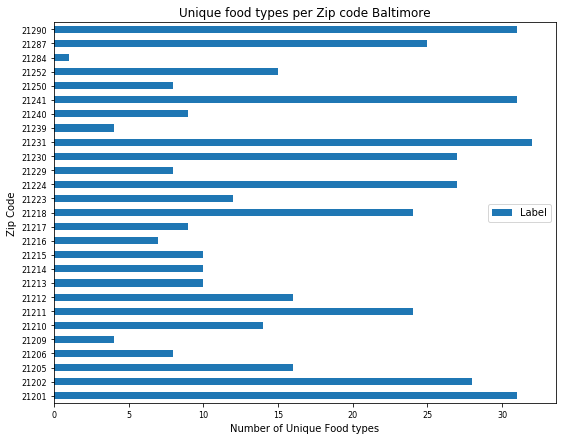

In [56]:
ax = grouped_baltimore.plot.barh(x='Neighborhood', y='Label', title = 'Unique food types per Zip code Baltimore', figsize = (9,7))
ax.set_xlabel('Number of Unique Food types')
ax.set_ylabel('Zip Code')
ax.tick_params(labelsize=8)
#ax.tick_params(axis="y", labelsize=20)

Lots of zipcodes with more than 20 unique types of restaurants

In [32]:
# Get a bool series representing which row satisfies the condition i.e. True for > 20 unique food spots
seriesObj = grouped_baltimore.apply(lambda x: True if x['Label'] > 20 else False , axis=1)
 
# Count number of True in series
Baltimore_food_zips = (len(seriesObj[seriesObj == True].index)/len(grouped_baltimore['Neighborhood']))*100
print('Number of zip codes in Baltimore with greater than 20 types of food venues = ',Baltimore_food_zips,'%')

Number of zip codes in Baltimore with greater than 20 types of food venues =  37.03703703703704 %


## Seattle

In [33]:
csv_s = pd.read_csv("Seattle-zips.csv", delimiter = ';')
seattle_zips = pd.DataFrame(csv_s)
seattle_zips.head()

Zip     City State   Latitude   Longitude  Timezone  \
0  98144  Seattle    WA  47.585770 -122.300810        -8   
1  98133  Seattle    WA  47.733852 -122.344610        -8   
2  98174  Seattle    WA  47.604718 -122.335230        -8   
3  98145  Seattle    WA  47.432251 -121.803388        -8   
4  98105  Seattle    WA  47.663770 -122.301180        -8   

   Daylight savings time flag               geopoint  
0                           1    47.58577,-122.30081  
1                           1   47.733852,-122.34461  
2                           1   47.604718,-122.33523  
3                           1  47.432251,-121.803388  
4                           1    47.66377,-122.30118

In [34]:
all_venues_seattle = getNearbyVenues(names=seattle_zips['Zip'],
                                   latitudes=seattle_zips['Latitude'],
                                   longitudes=seattle_zips['Longitude']
                                  )

98144
98133
98174
98145
98105
98136
98140
98160
98107
98104
98132
98122
98115
98119
98146
98158
98101
98188
98118
98102
98121
98116
98131
98198
98166
98177
98148
98171
98178
98184
98190
98195
98125
98103
98151
98138
98106
98168
98111
98185
98126
98181
98112
98060
98199
98129
98114
98109
98124
98155
98154
98161
98130
98108
98191
98134
98164
98117
98150


In [35]:
#Odd names are food venues that don't end in the work Restaurant based on Foresquare category data
odd_names = ['BBQ Joint','Bagel Shop','Bakery','Bistro','Breakfast Spot','Bubble Tea Shop','Burger Joint','Burrito Place','Café','Cheese Shop','Chocolate Shop','Coffee Shop','Creperie','Cupcake Shop','Deli / Bodega','Dessert Shop','Diner','Donut Shop','Farmers Market','Fish Market','Food Stand','Food Truck','Fried Chicken Joint','Frozen Yogurt Shop','Gastropub','Hot Dog Joint','Ice Cream Shop','Irish Pub','Juice Bar','Mac & Cheese Joint','Noodle House','Pie Shop','Pizza Place','Poke Place','Salad Place','Sandwich Place','Snack Place','Soup Place','Steakhouse','Taco Place','Tea Room','Wings Joint']
food_seattle = all_venues_seattle[all_venues_seattle['Venue Category'].str.contains("Restaurant")]
other_foods_seattle = all_venues_seattle.loc[all_venues_seattle['Venue Category'].isin(odd_names)]

x = [food_seattle, other_foods_seattle]
food_seattle = pd.concat(x)
food_seattle.set_index('Neighborhood',inplace = True)
food_seattle.drop_duplicates(inplace = True)
food_seattle.head()

Neighborhood Latitude  Neighborhood Longitude           Venue  \
Neighborhood                                                                  
98144                      47.58577              -122.30081  Buddha Bruddah   
98144                      47.58577              -122.30081          Heyday   
98144                      47.58577              -122.30081     Thai Recipe   
98144                      47.58577              -122.30081           Homer   
98144                      47.58577              -122.30081     Baja Bistro   

              Venue Latitude  Venue Longitude            Venue Category  
Neighborhood                                                             
98144              47.583285      -122.302322       Hawaiian Restaurant  
98144              47.590477      -122.292367   New American Restaurant  
98144              47.578055      -122.298778           Thai Restaurant  
98144              47.576706      -122.309998  Mediterranean Restaurant  
98144              47.581555      -122.314256        Mexican Restaurant

In [36]:
food_seattle.reset_index(inplace=True)
food_seattle['Label'] = ""
category_list = []
for row in food_seattle.index:
    if food_seattle.at[row, 'Venue Category'] in category_list:
        food_seattle.at[row, 'Label'] = category_list.index(food_seattle.at[row, 'Venue Category'])
    else:
        category_list = category_list + [food_seattle.at[row,'Venue Category']]
        #print(category_list)
        food_seattle.at[row, 'Label'] = category_list.index(food_seattle.at[row, 'Venue Category'])
food_seattle.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         98144               47.58577              -122.30081   
1         98144               47.58577              -122.30081   
2         98144               47.58577              -122.30081   
3         98144               47.58577              -122.30081   
4         98144               47.58577              -122.30081   

            Venue  Venue Latitude  Venue Longitude            Venue Category  \
0  Buddha Bruddah       47.583285      -122.302322       Hawaiian Restaurant   
1          Heyday       47.590477      -122.292367   New American Restaurant   
2     Thai Recipe       47.578055      -122.298778           Thai Restaurant   
3           Homer       47.576706      -122.309998  Mediterranean Restaurant   
4     Baja Bistro       47.581555      -122.314256        Mexican Restaurant   

  Label  
0     0  
1     1  
2     2  
3     3  
4     4

In [37]:
# create map of food locations, color based on category type
lat = cities3.loc['Seattle','Latitude']
lng = cities3.loc['Seattle', 'Longitude']
map_food_s = folium.Map(location=[lat, lng], zoom_start=12)

# set color scheme for the clusters
x = np.arange(len(category_list))
ys = [i + x + (i*x)**2 for i in range(len(category_list))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cate, lab in zip(food_seattle['Venue Latitude'], food_seattle['Venue Longitude'],food_seattle['Venue Category'], food_seattle['Label']):
    label = folium.Popup(str(cate), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[lab-1],
        fill=True,
        fill_color=rainbow[lab-1],
        fill_opacity=0.7).add_to(map_food_s)
       
map_food_s

In [38]:
grouped_seattle = food_seattle.groupby('Neighborhood')
grouped_seattle = grouped_seattle.agg({'Label':'nunique'})
grouped_seattle.reset_index(inplace = True)
grouped_seattle.head()

Neighborhood  Label
0         98101     33
1         98102     26
2         98103     30
3         98104     34
4         98105     34

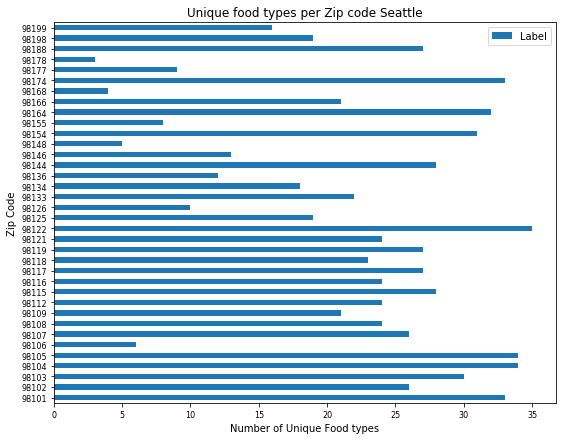

In [43]:
ax = grouped_seattle.plot.barh(x='Neighborhood', y='Label', title = 'Unique food types per Zip code Seattle', figsize=(9,7))
ax.set_xlabel('Number of Unique Food types')
ax.set_ylabel('Zip Code')
ax.tick_params(labelsize=8)

In [45]:
# Get a bool series representing which row satisfies the condition i.e. True for > 20 unique food spots
seriesObj = grouped_seattle.apply(lambda x: True if x['Label'] > 20 else False , axis=1)
 
# Count number of True in series
Seattle_food_zips = (len(seriesObj[seriesObj == True].index)/len(grouped_seattle['Neighborhood']))*100
print('Number of zip codes in Seattle with greater than 20 types of food venues = ',Seattle_food_zips,'%')

Number of zip codes in Seattle with greater than 20 types of food venues =  63.888888888888886 %


## Milwaukee

In [46]:
csv_m = pd.read_csv("Milwaukee-zips.csv", delimiter = ';')
milwaukee_zips = pd.DataFrame(csv_m)
milwaukee_zips.head()

Zip       City State   Latitude  Longitude  Timezone  \
0  53208  Milwaukee    WI  43.047863  -87.96618        -6   
1  53206  Milwaukee    WI  43.076179  -87.93476        -6   
2  53224  Milwaukee    WI  43.153865  -88.04032        -6   
3  53207  Milwaukee    WI  42.985465  -87.89998        -6   
4  53217  Milwaukee    WI  43.143510  -87.90894        -6   

   Daylight savings time flag             geopoint  
0                           1  43.047863,-87.96618  
1                           1  43.076179,-87.93476  
2                           1  43.153865,-88.04032  
3                           1  42.985465,-87.89998  
4                           1   43.14351,-87.90894

In [47]:
all_venues_milwaukee = getNearbyVenues(names=milwaukee_zips['Zip'],
                                   latitudes=milwaukee_zips['Latitude'],
                                   longitudes=milwaukee_zips['Longitude']
                                  )

53208
53206
53224
53207
53217
53234
53222
53278
53288
53228
53214
53202
53285
53221
53225
53205
53215
53274
53270
53209
53172
53295
53201
53210
53237
53259
53227
53268
53218
53277
53219
53280
53204
53220
53290
53203
53284
53212
53211
53216
53267
53263
53281
53223
53213
53233
53226
53293


In [48]:
#Odd names are food venues that don't end in the work Restaurant based on Foresquare category data
odd_names = ['BBQ Joint','Bagel Shop','Bakery','Bistro','Breakfast Spot','Bubble Tea Shop','Burger Joint','Burrito Place','Café','Cheese Shop','Chocolate Shop','Coffee Shop','Creperie','Cupcake Shop','Deli / Bodega','Dessert Shop','Diner','Donut Shop','Farmers Market','Fish Market','Food Stand','Food Truck','Fried Chicken Joint','Frozen Yogurt Shop','Gastropub','Hot Dog Joint','Ice Cream Shop','Irish Pub','Juice Bar','Mac & Cheese Joint','Noodle House','Pie Shop','Pizza Place','Poke Place','Salad Place','Sandwich Place','Snack Place','Soup Place','Steakhouse','Taco Place','Tea Room','Wings Joint']
food_milwaukee = all_venues_milwaukee[all_venues_milwaukee['Venue Category'].str.contains("Restaurant")]
other_foods_milwaukee = all_venues_milwaukee.loc[all_venues_milwaukee['Venue Category'].isin(odd_names)]

x = [food_milwaukee, other_foods_milwaukee]
food_milwaukee = pd.concat(x)
food_milwaukee.set_index('Neighborhood',inplace = True)
food_milwaukee.drop_duplicates(inplace = True)
food_milwaukee.head()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                  
53208                     43.047863               -87.96618   
53208                     43.047863               -87.96618   
53208                     43.047863               -87.96618   
53208                     43.047863               -87.96618   
53206                     43.076179               -87.93476   

                                  Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                               
53208                 JJ Fish & Chicken       43.048171       -87.957441   
53208                        Troop Cafe       43.039246       -87.957409   
53208                   Fred's Drive-In       43.048888       -87.973428   
53208                           Wendy’s       43.060389       -87.971561   
53206         Center Street Fish Market       43.067980       -87.927260   

                    Venue Category  
Neighborhood                        
53208           Seafood Restaurant  
53208          American Restaurant  
53208          American Restaurant  
53208         Fast Food Restaurant  
53206           Seafood Restaurant

In [49]:
food_milwaukee.reset_index(inplace=True)
food_milwaukee['Label'] = ""
category_list = []
for row in food_milwaukee.index:
    if food_milwaukee.at[row, 'Venue Category'] in category_list:
        food_milwaukee.at[row, 'Label'] = category_list.index(food_milwaukee.at[row, 'Venue Category'])
    else:
        category_list = category_list + [food_milwaukee.at[row,'Venue Category']]
        food_milwaukee.at[row, 'Label'] = category_list.index(food_milwaukee.at[row, 'Venue Category'])
food_milwaukee.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         53208              43.047863               -87.96618   
1         53208              43.047863               -87.96618   
2         53208              43.047863               -87.96618   
3         53208              43.047863               -87.96618   
4         53206              43.076179               -87.93476   

                       Venue  Venue Latitude  Venue Longitude  \
0          JJ Fish & Chicken       43.048171       -87.957441   
1                 Troop Cafe       43.039246       -87.957409   
2            Fred's Drive-In       43.048888       -87.973428   
3                    Wendy’s       43.060389       -87.971561   
4  Center Street Fish Market       43.067980       -87.927260   

         Venue Category Label  
0    Seafood Restaurant     0  
1   American Restaurant     1  
2   American Restaurant     1  
3  Fast Food Restaurant     2  
4    Seafood Restaurant     0

In [50]:
# create map of food locations, color based on category type
lat = cities3.loc['Milwaukee','Latitude']
lng = cities3.loc['Milwaukee', 'Longitude']
map_food_m = folium.Map(location=[lat, lng], zoom_start=12)

# set color scheme for the clusters
x = np.arange(len(category_list))
ys = [i + x + (i*x)**2 for i in range(len(category_list))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cate, lab in zip(food_milwaukee['Venue Latitude'], food_milwaukee['Venue Longitude'],food_milwaukee['Venue Category'], food_milwaukee['Label']):
    label = folium.Popup(str(cate), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[lab-1],
        fill=True,
        fill_color=rainbow[lab-1],
        fill_opacity=0.7).add_to(map_food_m)
       
map_food_m

In [51]:
grouped_milwaukee = food_milwaukee.groupby('Neighborhood')
grouped_milwaukee = grouped_milwaukee.agg({'Label':'nunique'})
grouped_milwaukee.reset_index(inplace = True)
grouped_milwaukee.head()

Neighborhood  Label
0         53172      9
1         53201     19
2         53202     31
3         53203     27
4         53204     27

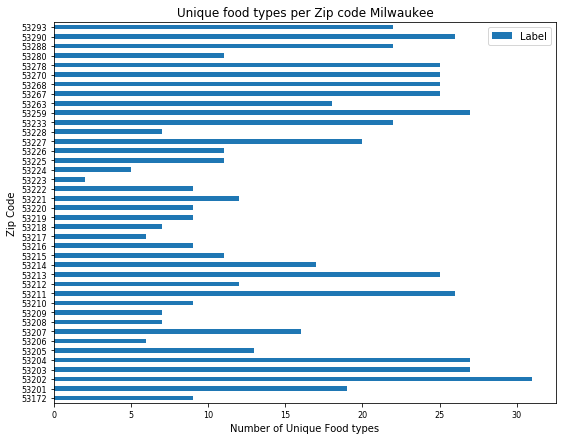

In [53]:
ax = grouped_milwaukee.plot.barh(x='Neighborhood', y='Label', title = 'Unique food types per Zip code Milwaukee', figsize=(9,7))
#ax.title('Unique food types per Zip code Baltimore')
ax.set_xlabel('Number of Unique Food types')
ax.set_ylabel('Zip Code')
ax.tick_params(labelsize=8)

In [54]:
# Get a bool series representing which row satisfies the condition i.e. True for > 20 unique food spots
seriesObj = grouped_milwaukee.apply(lambda x: True if x['Label'] > 20 else False , axis=1)
 
# Count number of True in series
Milwaukee_food_zips = (len(seriesObj[seriesObj == True].index)/len(grouped_milwaukee['Neighborhood']))*100
print('Number of zip codes in Milwaukee with greater than 20 types of food venues = ',Milwaukee_food_zips,'%')

Number of zip codes in Milwaukee with greater than 20 types of food venues =  35.0 %


## Results

Wikipedia data of US cities was imported which contained the cities, their population density and their land area. Baltimore was chosen as the main city of interest and the City data was filtered by population density centered around Baltimore. This data was also sorted by land area, again centered around Baltimore, and the cities that fell in both of the lists closest to Baltimore's land area and population density were chosen. These cities were Seattle, WA and Milwaukee, WI.

Zip code data for the three cities was imported and foursquare data was gathered for venues in each zip code of each city. This data was then processed to include only food related venues such as venues with categories that end in "Restaurant" or ones with odd names such as "BBQ Joint". These venues were given an integer label based on their category and then mapped for all three cities. The colorful display of venues gives the viewer an idea of how many unique food venue categories there are in each city. This data was then plotted, number of unique food venue types by zip code for each city to quantify what the maps illustrate. 

Milwaukee had the lowest percent of zip codes with more than 20 types of food venues at 35%, followed by Baltimore at 37%, and Seattle had the highest at 63.9% 

## Discussion

For a Foodie looking to travel to a new city or to move to a new city (about the same size as Baltimore) based on the variety of food options, this data would suggest that they move to Seattle, Washington. Seattle had the largest percent of zip codes with over 20 unique food venues, at 63.9%, almost double Milwaukee, WI. 
One observation that was made during this analysis is that the foursquare data may not contain all the restaurants in a city, especially if they are newer. This means that these numbers may not be completely accurate but may provide enough information for the purpose of this analysis. For example, there were many zipcodes in Baltimore that were analyzed but had no food venues. Is this the case? Or is the dataset lacking?

## Conclusion

The purpose of this project was to identify cities of similar size to Baltimore, Maryland that a Foodie would want to travel to or move to. By identifying cities of similar size to Baltimore, and using Foursquare data, we were able to compare the three chosen cites based on the number of unique food venue types. The foursquare data was filtered to include only food venues and then plotted to show the unique types of food categories per zipcode. This data shows that a Foodie would be wise to travel to Seattle to experience the 63.9% of zip codes that have over 20 unique types of food venues. Additionally, Milwaukee and Baltimore could invest in opening a more diverse set of food venues to attract more tourism.